<p>1. Usando la librería seaborn, cread una gráfica que nos muestre el número de personas que han hecho una solicitud de ticket en cada año. Hacedlo solo para los del tipo "Problema".</p>

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [39]:
tickets = pd.read_csv("DATOS/tickets_completo.csv")

In [6]:
tickets.head(2)

,Unnamed: 0,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,año
0,0,GDDENR-5042564453,2016-07-13,1735.0,4.0,Acceso&%Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0.0,5.0,2016
1,1,GDDENR-8042508060,2016-05-18,1566.0,10.0,Acceso&%Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0.0,5.0,2016


In [40]:
tickets_problema= tickets[tickets["tipo"] == "Problema"]

In [14]:
tickets_problema.head()

,Unnamed: 0,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,año
0,0,GDDENR-5042564453,2016-07-13,1735.0,4.0,Acceso&%Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0.0,5.0,2016
1,1,GDDENR-8042508060,2016-05-18,1566.0,10.0,Acceso&%Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0.0,5.0,2016
2,2,GDDESR-1342539995,2016-06-18,569.0,29.0,Sistema,Problema,0 - Sin Clasificar,0 - Sin Asignar,3.0,5.0,2016
4,4,GDLEER-0042524120,2016-06-03,1842.0,31.0,Software,Problema,2 - Normal,0 - Sin Asignar,0.0,5.0,2016
5,5,GDLEER-0142608095,2016-08-26,59.0,20.0,Software,Problema,2 - Normal,0 - Sin Asignar,1.0,1.0,2016


In [26]:
def sacar_mes(fecha):   
    return fecha.split("-")[1]

In [29]:
type(tickets["fecha"][0])

str

In [32]:
tickets.isna().sum()

Unnamed: 0         0
id_ticket          0
fecha              0
id_empleado        0
id_agente          0
categoría          0
tipo               0
severidad          0
prioridad          0
días_resolución    0
satisfacción       0
año                0
dtype: int64

In [31]:
tickets.dropna(inplace=True)

In [33]:
tickets.head()

,Unnamed: 0,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,año
0,0,GDDENR-5042564453,2016-07-13,1735.0,4.0,Acceso&%Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0.0,5.0,2016
1,1,GDDENR-8042508060,2016-05-18,1566.0,10.0,Acceso&%Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0.0,5.0,2016
2,2,GDDESR-1342539995,2016-06-18,569.0,29.0,Sistema,Problema,0 - Sin Clasificar,0 - Sin Asignar,3.0,5.0,2016
3,3,GDDTSR-5942488006,2016-04-28,320.0,40.0,Sistema,Solicitud,0 - Sin Clasificar,0 - Sin Asignar,9.0,5.0,2016
4,4,GDLEER-0042524120,2016-06-03,1842.0,31.0,Software,Problema,2 - Normal,0 - Sin Asignar,0.0,5.0,2016


In [ ]:
df_copia["mes"] = (df_copia["effective_to_date"].apply(sacar_mes))

In [34]:
tickets["mes"] = (tickets["fecha"].apply(sacar_mes))

In [37]:
tickets.head(2)

,Unnamed: 0,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,año,mes,semestre
0,0,GDDENR-5042564453,2016-07-13,1735.0,4.0,Acceso&%Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0.0,5.0,2016,07,semestre2
1,1,GDDENR-8042508060,2016-05-18,1566.0,10.0,Acceso&%Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0.0,5.0,2016,05,semestre1


In [36]:
tickets["semestre"] = np.where(tickets["mes"] > "06", "semestre2", "semestre1")

In [38]:
#Guardamos el dataframe
tickets.to_csv("DATOS/tickets_completo.csv")

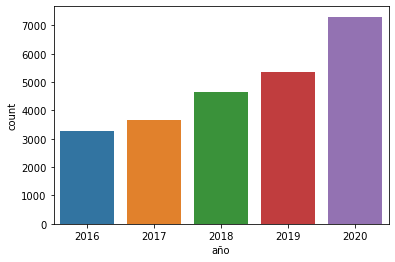

In [41]:
plt.figure()
#Como ya hicimos un dataframe que contiene solo los tickets de problemas, hacemos el countplot solo por año.
fig = sns.countplot(x = "año", data = tickets_problema)

<p>2. La gráfica anterior nos ha mostrado una tendencia ascendente en el número de solicitudes a lo largo de los años, lo que preocupa a la empresa, por lo que quieren seguir analizando los datos para ver si son capaces de identificar los problemas subyacentes a estas solicitudes. Para esto, quieren saber si hay diferencias a lo largo del año.</p> 
<p>En concreto nos piden que hagamos un subplot con seaborn donde:</p>

<ul><li>En la primera gráfica tengamos la gráfica que creamos en el ejercicio anterior</li>
<li>En la segunda gráfica tengamos la comparación por años y sementres para el número de tikects de tipo "Problema".</li></ul>

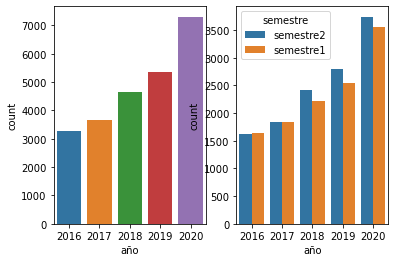

In [43]:
fig, axes = plt.subplots(1,2, figsize)
sns.countplot(x = "año", data = tickets_problema, ax = axes[0])
sns.countplot(x = "año", data = tickets_problema, hue = "semestre", ax = axes[1])
plt.show()

<p>3. La empresa se siente algo aliviada al ver que no hay diferencias entre semestres, pero seguimos sin identificar porque cada año tenemos más solicitudes. Nuestras jefas quieren saber ahora, que prioridad tienen los tickets que tenemos en el conjunto de datos.</p> 
<p>Por eso nos piden que volvamos a hacer un subplot:</p>
<ul><li>En la primera gráfica deberíamos tener la gráfica creada en el ejercicio 1</li>
<li>En la segunda gráfica deberíamos incluir el número de tickets por año en función de la prioridad que tienen.</li></ul>

<p>4. Hasta ahora hemos estado viendo que no parece que haya nada alarmante. Por lo que ahora quieren que evaluemos la cantidad de trabajo que cada empleado esta haciendo, para poder identificar rápidamente un problema en la distribución de tareas y tomar medidas para solucionarlo. Para ello nos piden que hagamos dos gráficas en un subplot: </p>
<ul><li>La primera gráfica tiene que tener los 5 empleados con mayor número de tickets, deberemos mostrar quienes son y cuál es total de tickets que atienden cada uno.</li>
<li>La primera gráfica tiene que tener los 5 empleados con menor número de tickets, deberemos mostrar quienes son y cuál es total de tickets que atienden cada uno.</li></ul>